## Curve Fitting with Genetic Algorithms 
By Max Wiesner
<br>
<br>
#### The High Level Rundown
In this project we will look at how genetic algorithms can use evolutionary search to mutate a number of generations to find a regression curve estination. We will compare our results to the sumulated annealing algorithm, and look at the overall fitness acheived through both methods, and the run time differences between the two. 
<br>
We will apply these tequniques to estimate the following five functions.
<ul>
    <li>$f_1 (x) = \frac{1}{5}e^{\frac{x}{4}} - \sin{2x}$</li>
    <li>$f_2 (x) = \sin{2x} - \cos{3x - 1} + 2\sin{\frac{x}{2} + 1}$</li>
    <li>$f_3 (x) = e^{\sin{2x} - e^{\cos{3x}}}$</li>
    <li>$f_4 (x) = \frac{1}{20}x^2 - \frac{1}{2}x + 5\sin{3x}$</li>
    <li>$f_5 (x) = \frac{1}{20}x^2 - \frac{1}{2}\sqrt{x} + 5\sin{3x}$</li>
</ul>
Performance will also be dependant on the different inputs to each algorithm we have manifest below. Note, the main focus of this project is the genetic algorithm and evolutionary search, not the sumulated annealing algorithm, thus, we will not go in depth on analyzing the changes in performance that come with varying the temperature, cooling rate, and cooling step fraction. Instead, we will vary two parameters that both these functions share (in a sense). 
<ul>
    <li> Iterations - The number of iterations each algorithm will run, with the genetic algorithm this is the number of generations it will mutate and breed; with the simulated annealing, this is the number of times we pick a random neighbor that potentially replaced our current best answer.</li>
    <li> Population - Population is the number of new candidates we produce or hold on to in each iteration. So, for the genetic algorithm, this is clearly the population; ie. in each iteration, we either update the current population, or we reorder it and reevaluate the current fitness of the population. For the simulated annealing, this is the number of new neighbors we produce from our current best state. </li>
    <li><i>Optional Parameters</i> - The number of points we are estimating against, the total number of tests to be run for each function per each (Iterations, Instances) combination. We will not focus on these in the analysis. </li>
<\ul>
Below we see the call to startAllIterations, it takes the following arguments:
<div align="center"><br>$startAllIterations(iterations, instances, points, numTests)$<br></div>
    <br>
The different combinations of iterations, population for each test and algorithm has already been picked out, and will be highlighted in the results summary below. The reason for the parameters below are for accomodating available CPU performance; ie. if you are confident in your super fast new MacBook Pro with the M1 chip, then put iterations = population = 1, 100%. This will run the intended amount of each combination. But if you are repping the google chromebook, then you may put iterations = population = .25, 25%. This will still run all of the intended combinations, but adjust the totals proportionally to the percentages entered, since running the full intended amount, 100%, might take some hours.  
<br>
<br>
A progress bar will update as tests are completed. 
<br>
<br>

### Simulation Results

In [1]:
%matplotlib inline
from generatePlots import startAllIterations, printVizs

iterations = 1    # optimal : 1, otherwise : must be at least 5% to avoid Null equations 
population = 1    # optimal : 1, otherwise : must be at least 5% to avoid Null equations
num_points = 1    # optimal : 1
num_tests  = 5    # optimal : 5
startAllIterations(iterations, population, num_points, num_tests)
printVizs()

  0%|          | 0/150 [00:00<?, ?it/s]C:\Users\maxan\CSCI\CSCI_3202\genetic_ai\symbolicExpressions.py:176: RuntimeWarning: overflow encountered in double_scalars
  return reduce(lambda a,b:a*b, flist, 1.0 )
 43%|████▎     | 64/150 [1:04:44<1:12:38, 50.68s/it] C:\Users\maxan\CSCI\CSCI_3202\genetic_ai\symbolicExpressions.py:252: RuntimeWarning: overflow encountered in double_scalars
  return f1/f2
 44%|████▍     | 66/150 [1:05:26<50:07, 35.80s/it]  C:\Users\maxan\CSCI\CSCI_3202\genetic_ai\symbolicExpressions.py:176: RuntimeWarning: invalid value encountered in double_scalars
  return reduce(lambda a,b:a*b, flist, 1.0 )
100%|██████████| 150/150 [3:06:23<00:00, 74.55s/it]   


,Function 1,Function 2,Function 3,Function 4,Function 5,Fitness Avg by Criteria,Run Time Avg by Criteria
"Criteria: Num of Iterations, Population Size",,,,,,,
"1000, 40",-8.86351,-65.0061,-40.3683,-939.243,-216.626,-254.022,31.5052
"500, 80",-6.06685,-74.2547,-26.9845,-944.496,-252.033,-260.767,22.2384
"250, 120",-8.29279,-73.0383,-38.471,-920.077,-316.143,-271.204,16.0286
Fitness Avg by Function,-7.74105,-70.7664,-35.2746,-934.605,-261.601,-261.998,nan
Run Time Avg by Function,24.767,26.1129,25.9134,26.2706,13.2232,nan,23.2574


,Function 1,Function 2,Function 3,Function 4,Function 5,Fitness Avg by Criteria,Run Time Avg by Criteria
"Criteria: Num of Iterations, Population Size",,,,,,,
"1000, 40",-13.1117,-129.78,-63.9991,-2103.87,-484.074,-558.967,170.214
"500, 80",-18.7637,-66.2294,-46.5863,-2130.11,-290.476,-510.434,191.414
"250, 120",-17.4613,-121.131,-70.5451,-2285.07,-415.469,-581.934,86.3591
Fitness Avg by Function,-16.4456,-105.714,-60.3769,-2173.02,-396.673,-550.445,nan
Run Time Avg by Function,99.7679,185.591,166.088,105.929,189.269,nan,149.329


#### Data Table Details
> <span style="color:lightgreen">Green : </span> Best fitness per column - Function, cooresponding to the index column of iterations, population<br>
> <span style="color:lightblue">Blue : </span> Overall best performance - Highlights the column and row best performances on average.<br>
> <span style="color:#ffcccb">Red </span> Benchmark KPI for each algorithm - Shows the average fitness acheived from the overall tests with the ranging criteria. Ans the overall runtime per test against the ranging average inputs. 
<br>
##### Observations 
As seen above, the two tables highlight the observed statistics for each of the algorithms. Simmulated annealing seems to perform a lot faster on average, but at the cost of its fitness functions. The genetic algorithm takes longer, but has almost twice as good fitness functions as compared to the simulated annealing. On average, we also observed that the first and third functions were the functions we were able to consistently approximate the best, followed by the second, then fifth, then fourth function. Funciton four and five consistently performed substancially worst, and considering these two are the only two functions of the five that have regular polynomial components, this is peculiar. It seems we were more effective in estimating nonlinear functions than near linear ones. 
<br> 
<br>
#### Fitness : Standard Deviation, and Variance
Here we look closer at function 1; since it was the best performing on average, it is likely to show some insight on its consistency. Below we see the total tests used in estimating function 1. Five tests for each of the three conditions. Notice the standard deviation and variance of each of the categories. Generally, the more iterations, the better results we got, thus less variance. This is why we see in all of the cases we run, that the top category with the most iterations performing the best. It also gives insight that a lower population leads to better results to a certain degree in the genetic algorithm. This makes since because there will be considerably better 'average genes' in a smaller population once good genes are found. With simulated annealing on the other hand, we saw the best performance with somewhat balanced iterations to population criteria. 

In [2]:
if num_tests == 5:
    printVizs(1)

Funciton 1 Variance, Standard Deviation - Genetic Algorithm


,Test 1,Test 2,Test 3,Test 4,Test 5,Mean,Std Dev,Variance
"Criteria: Num of Iterations, Population Size",,,,,,,,
"1000, 40",-10.811,-14.157,-10.982,-8.864,-10.092,-10.981,1.754,25.735
"500, 80",-6.067,-12.253,-12.610,-11.982,-12.958,-11.174,2.575,32.528
"250, 120",-16.410,-11.465,-8.293,-11.069,-11.229,-11.693,2.625,35.033




Funciton 1 Variance, Standard Deviation - Simulated Annealing Algorithm


,Test 1,Test 2,Test 3,Test 4,Test 5,Mean,Std Dev,Variance
"Criteria: Num of Iterations, Population Size",,,,,,,,
"1000, 40",-10.811,-14.157,-10.982,-8.864,-10.092,-10.981,1.754,25.735
"500, 80",-6.067,-12.253,-12.610,-11.982,-12.958,-11.174,2.575,32.528
"250, 120",-16.410,-11.465,-8.293,-11.069,-11.229,-11.693,2.625,35.033


Write a brief analysis of your results. Some questions to answer:
- Which problem ran the fastest? Why do you think this is the case?
- Which problem ended with the highest fitness? Why do you think this is the case?
- How similar were the running times across the 5 repetitions?
- How similar were the final fitness scores across the 5 repetitions?
- Was there anything else interesting in your results?

### The Implementation
<b>Genetic Algorithm</b><br>
The structure for the genetic algorithm was split up into three main parts, with a few additional helper functions. We put everything inside of a class GASolver, where the details and specifics of the state could be easily tracked and accessed. All of our expressions that we mutated or passed on in each iteration were kept in a data structure called 'chillums', slang for them childrens, since we are dabbling in genetics and evolutionary mutation, it seemed fitting. Each child of the current population was stored with its fitness value, and its selection weight, thus we could easily locate all the needed details when mutating the population and deciding who to keep and scrap. 
> <b>run_ga_iterations</b> : This method initiated the evolution, we first randomly created N children, and then we made these kids have kids, then we bred their kids with some of them, or maybe other kids, and continued this for iter_n generations. We loop through this process in this function, but we call another function to do the work for us. <br>
> <b>make_next_generation</b> : Here, we sort all of the current children by their fitness level, and keep the top 20% for breeding in the next generation. The other 80% are sent off to a figuritive labratory where we mix and match their genes. In this case, we are swapping sub trees of their expressions. Next, we join the two groups back together, in descending order of fitness values, and we record our current bests.<br>
> <b>mutate_all_exprs</b> : In this method, we are doing two operations to the 80% that need to be improved. First, we assign all of the childrens in pairs, next we cross breed the pair, and then mutate the pair, or we randomly do one of the two operations on them; Either we swap their sub trees (cross their genes), or we mutate them separately. This is like randomly changing a random part of their sub trees, but independent of its pair. Finally, we check if their new expression is valid, ie. no $\sqrt{-1}$, and if so, we move on to the next pair, until the entire 80% we were passed is an entirely new group. Then we pass these back to be joined with the elite 20% that were good enough to avoid this process. <br>

*All of the code for this can be found in geneticSearchAlgorithms.py, and the code mangling, storing, and analyzing this data can be found in generatePlots.py
<br><br>
<b>Simulated Annealing Algorithm</b><br>
This algorithm was comprised of two main funcitons. Here, our goal was to start with an initial child, and through each iteration, we generated N mutations of our one child, this was done by the same random subtree alteration we used above in the genetic algorithms implementation. From here, we randomly selected a expression from this group of 'neighbors' (since they are closely related to the main child), and we then chose either to take this random one, of keep our current. 
> <b>run_simulated_annealing</b> : This is the main function where our control logic lives. We first generate a random expression, making sure that this random expression is a valid one. Next we record its fitness level in longitutal array of stats that keeps a record of our iterations best for later plotting. Then, we enter the main loop. From here, we check if we need to reduce our temperature, the temperature updated based on what iteration we are currently on and the provided cooling step we set. It is used in making the descision of randomly keeping a less than optimal expression with the methodology that it could save us from local maxima and help us toward the goal of finding the global maxima; we reduce the temperature by the cooling fraction (how fast we want to decrement the temperature). Next, we compute a single step, save out current fitness, and update our global statistics. <br>
> <b>single_step</b> : In this function, we are passed the current expression (child) for the current iteration. Here, is where we generate the N neighbors of our current expression, also checking that we get N valid expressions. Next, we automatically accept better answers, with the caviot of that special occasion we highlighted above where we will take a worse expression to replace our good one on occasion, according to our current temperature. The temperature decreases as the iterations grow, so we are less likely to accept worse answers later on in the algorithm, and more likely at the beginning. 
<br>

*The code relating to this algorithm is found in simulatedAnnealing.py, as well as the data wrangling associated in generatePlots.py
<br><br><br>
#### Better Results?
With the genetic algorithm we observed that more iterations (generations) were always better. This is clear since if we only keep the top in each generation, there is only one way to generally go, up, unless we are incredibly statistically unfortunate and we can't randomly generate or mutate any better expressions. This could be the case when we are so close to the actual expression, but not the case when we are a fair ways away. So, better results will come with more generations (iterations), and varying the population size accordingly. Too small a population will take a long time to dramatically improve, but not longer than an incredibly large population. This is because as we increase the population, we increase the time that much more because at every iteration we will need to calculate the increase. 
<br>
##### Struggles? 
The computing time was the main difficulty in this. Having to mutate a population of size $.8N$, for <i>n_iter</i> generations, while also having to sort them descending at each step to reevaluate the new elitism group, is heavy on the CPU. Thats why we added the variables at the beginning so this simulation can be ran at lets say 50%, where we can still observe the results in proportion to what they are meant to be observed at. Though it should go without saying, a simulation ran at 50% the intended amount of iterations, and population size, will display worst results to that ran at a higher percentage with considerably more iterations, and population size.  
<br>
### Final Charts
Here we display the 'best of' categories we highlighted in our first set of data tables. For each algorithm, we chart the best performing function in the best performing group of functions, and we chart the function with the fastest runtime in the group of functions that had the fastest average runtime. These results will change for each new simulation, but the functions with the same criteria outlined will always be displayed. 




Genetic Algorithm : 
   [Best Performing Function in Highest Average Fitness Column] : Function 1
   Iterations = 500, Population = 80
   Function: sin((x * -2.0))
   Fitness: -6.066846096241524
   Runtime: 22.11899495124817



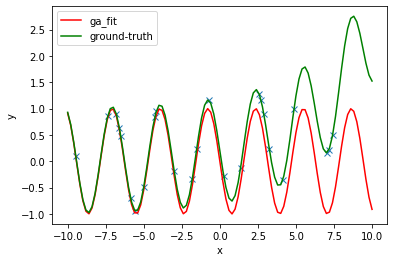

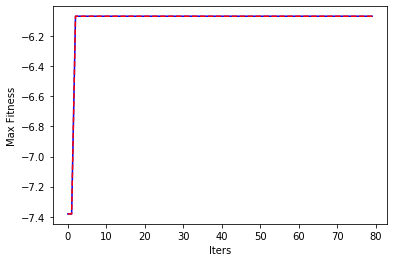




Genetic Algorithm : 
   [Best Performing Funciton in Fastest Average Runtime Column] : Function 4
   Iterations = 2500, Neighborhood Size = 120
   Function: exp((x * -0.25))
   Fitness: -920.077247384704
   Runtime: 18.537940979003906



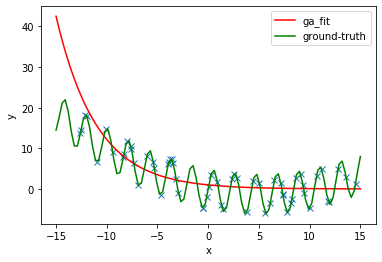

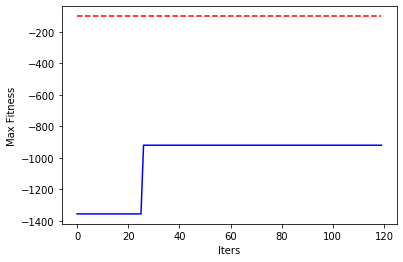






Simulated Annealing Algorithm : 
   [Best Performing Function in Highest Average Fitness Column] : Function 1
   Iterations = 1000, Population = 40
   Function: tanh(0.5)
   Fitness: -13.11166820570255
   Runtime: 99.20385909080505



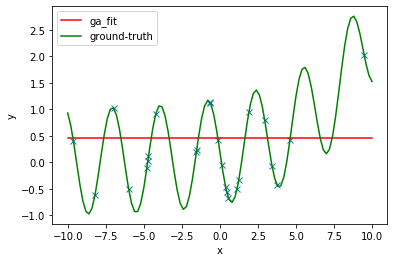

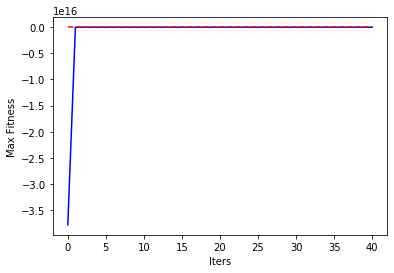




Simulated Annealing Algorithm : 
   [Best Performing Funciton in Fastest Average Runtime Column] : Function 5
   Iterations = 5000, Neighborhood Size = 80
   Function: (x/2.0)
   Fitness: -290.47647350360853
   Runtime: 70.25541925430298



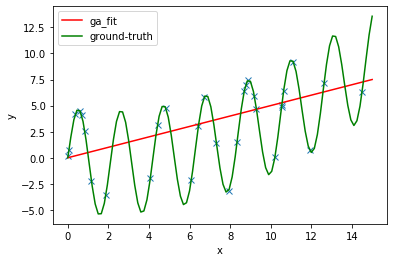

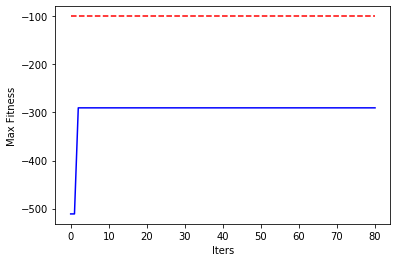

In [3]:
printVizs(2)

#### Thats All Folks!